In [ ]:
import numpy as np
from datascience import *
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.core.display import display, HTML

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Importing BeautifulSoup for Scraping the data from the url.
import requests 
from bs4 import BeautifulSoup

In [ ]:
# Funtion to display the table from the url.
def display_table(table):
  display(HTML(str(table)))

# Scraping the HTML formatted data into python format table.
def scrape_table(table):
    df = pd.read_html(str(table))
    df = pd.DataFrame(df[0])
    return Table.from_df(df)

In [ ]:
url ="https://vividmaps.com/sneaker-prices-mapped/"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')



In [ ]:
table = soup.findAll('table')[1]
display_table(table)

In [42]:
Scraped_table_shoes = scrape_table(table)
Scraped_table_shoes = Scraped_table_shoes.take(np.arange(0,48)).relabel(2,"Shoes Prices(USD)").drop(1,3)
Scraped_table_shoes


Country,Shoes Prices(USD)
Argentina,$187.65
Vietnam,$171.81
Taiwan,$160.82
Switzerland,$156.75
Singapore,$155.09
Thailand,$155.04
Saudi Arabia,$154.37
India,$153.16
South Africa,$146.22
Sweden,$145.27


In [43]:
def conversion(col1):
  return(round((float(col1.strip("$"))) * 1.34) - 145)

Scraped_table_shoes_difference = Scraped_table_shoes.with_column("Shoes Prices(USD)",Scraped_table_shoes.apply(conversion, "Shoes Prices(USD)")).relabel(1,"Shoes Price differences (CAD)")

def conversion_diff(col1):
   return(round((float(col1.strip("$"))) * 1.34))
Scraped_table_shoes = Scraped_table_shoes.with_column("Shoes Prices(USD)",Scraped_table_shoes.apply(conversion_diff, "Shoes Prices(USD)")).relabel(1,"Shoes Prices(CAD)")



In [ ]:
Scraped_table_shoes

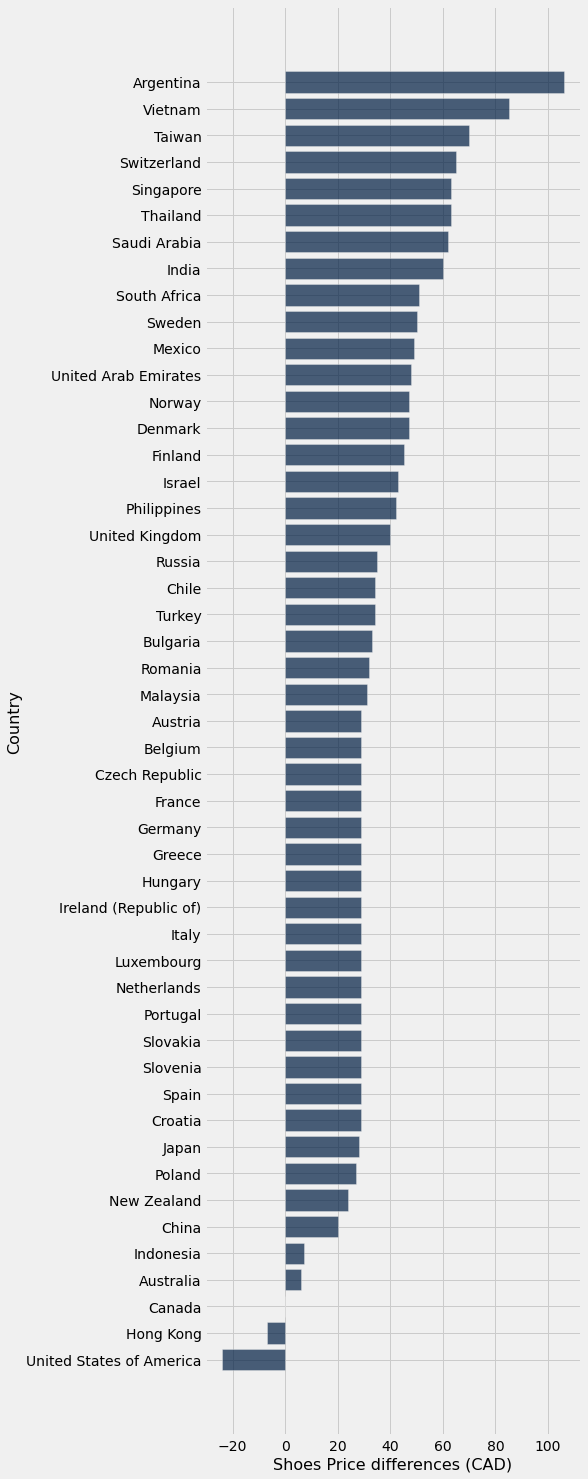

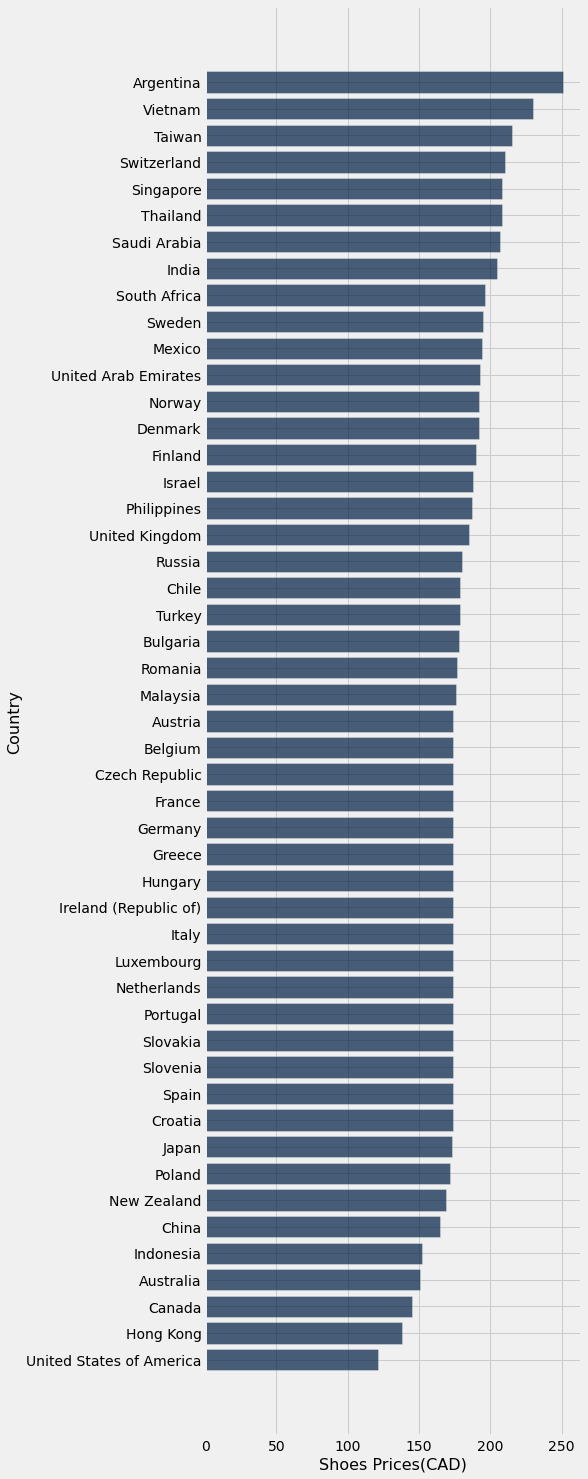

In [45]:
Scraped_table_shoes_difference.barh("Country")
Scraped_table_shoes.barh("Country")

In [ ]:
url ="https://www.countries-ofthe-world.com/world-currencies.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
table1 = soup.findAll('table')
display_table(table1)

In [52]:
Scraped_table_demo = scrape_table(table1)
Scraped_table_demo.where("ISO-4217", are.equal_to("USD")).show()


Country or territory,Currency,ISO-4217
American Samoa (USA),United States dollar,USD
Bonaire (Netherlands),United States dollar,USD
British Indian Ocean Territory (UK),United States dollar,USD
British Virgin Islands (UK),United States dollar,USD
Caribbean Netherlands (Netherlands),United States dollar,USD
Ecuador,United States dollar,USD
El Salvador,United States dollar,USD
Guam (USA),United States dollar,USD
Marshall Islands,United States dollar,USD
Micronesia,United States dollar,USD
